<a href="https://colab.research.google.com/github/AlyW8/Data-Science/blob/main/AlysWangU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 3 Project: The Right Likelihood for the Job

In unit 2, we asked "what's the true proportion of ____?"

In this unit's project, we'll ask "What's the true average of \_\_\_\_?" or "What's the true amount of \_\_\__?"

**Task**:

Two parts:

1. Propose a data set that's compatible with a single variable likelihood from pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one prior, and NONE of your priors can be a beta distribtuion
- Your likelihood CANNOT be a Bernoulli distribution nor a Binomial distribution.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The chemshift data anlysis portion of the Unit3NotesAK is your example. You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- A posterior predictive check is more important than the posterior for this project. Ask me if you want to know why.

- I didn't totally understand the chemical shift context--which means you don't have to totally understand the context of your data either! You should try to learn as you go, though.


In [ ]:
!pip install "preliz[full,notebook]"
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az
import pymc as pm



---


# An Analysis of Brandon Sanderson's Word Count

# Background
Brandon Sanderson is a well-known American author, most famous for his Cosmere universe, which includes, "Elantris, Mistborn, Warbreaker, The Stormlight Archive, White Sand, and anything from Arcanum Unbounded," as stated by Sanderson's website. He's also the continuer of Robert Jordan's Wheel of Time series. As a fantasy addict unfortunately withholden from access to his books, namely the Mistborn series, which I've been recommended over and over again, I'm incredibly curious about his bookly word count and how it compares to other authors (which I won't bother compiling data for but should be able to roughly tell from a quick Google Search).

# Data and Priors

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/AlyW8/Data-Science-Exercises/refs/heads/main/U3%20proj%20data%20-%20Sheet1%20(2).csv')

In [ ]:
data

,Name,WC
0,The Way of Kings,383124
1,Oathbringer,451912
2,Wind and Truth,491000
3,Elantris,208212
4,Mistborn: The Final Empire,214000
5,Warbreaker,196014
6,Words of Radiance,398238
7,Isles of the Emberdark,128904
8,Rhythm of War,455891
9,Skyward,135366


Aforementioned data was gathered by taking the books Google listed out as works written by Brandon Sanderson (honestly, it's pretty close to random, they never list complete series) and then searching up their word count. I typically used the word count listed by The Coppermind, but a concerningly large number of the word counts differed from source to source, and I don't know which one is right. I probably could've used a more reliably random process, but I was too lazy to acutally find every book written by Sanderson and then randomly select books from there.  

(array([6., 7., 1., 9., 6., 3., 0., 3., 4., 2., 0., 1., 0., 1., 1., 1., 1.,
        0., 2., 1.]),
 array([ 14864. ,  38670.8,  62477.6,  86284.4, 110091.2, 133898. ,
        157704.8, 181511.6, 205318.4, 229125.2, 252932. , 276738.8,
        300545.6, 324352.4, 348159.2, 371966. , 395772.8, 419579.6,
        443386.4, 467193.2, 491000. ]),
 <BarContainer object of 20 artists>)

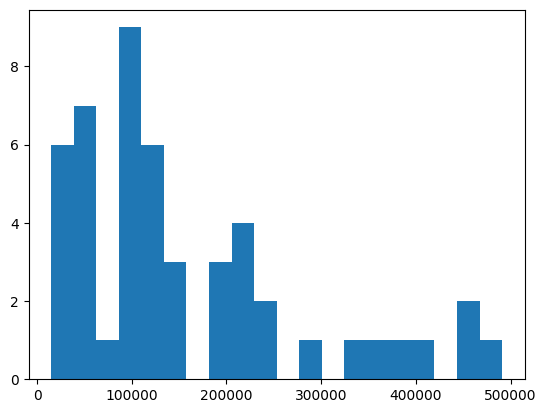

In [ ]:
plt.hist(data.WC, bins=20)


The data seems to be centered around 100,000 and is skewed right.

# Priors

I've assumed a uniform distribution for the mean because I don't know much about Brandon Sanderson's true word count. It seems to vary pretty widely between series, which is why I've also selected a standard deviation of 100000.

I've assumed that the data set I've gathered is a good representation of Sanderson's books, that the word counts I've gathered are accurate word counts, and that our prior has a mean uniformly distributed between 14864 and 491000 and a standard deviation in a half normal distribution with standard deviation 100000.  

# Likelihood No 1

In [ ]:
#N for normal
with pm.Model() as bswc_model:
    # I have no idea where the mean should be, but its reasonalbe to assume
    # its between our lowest and highest values recorded
    μ = pm.Uniform('μ', lower=14864, upper=491000)

    #this one is new, but its exactly what it sounds like: half of a normal dist
    σ = pm.HalfNormal('σ', sigma=100000)

    #our fancy new likelihood, with two priors
    Y = pm.Gamma('Y', mu = μ, sigma = σ, observed=data.WC)
    idata = pm.sample()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

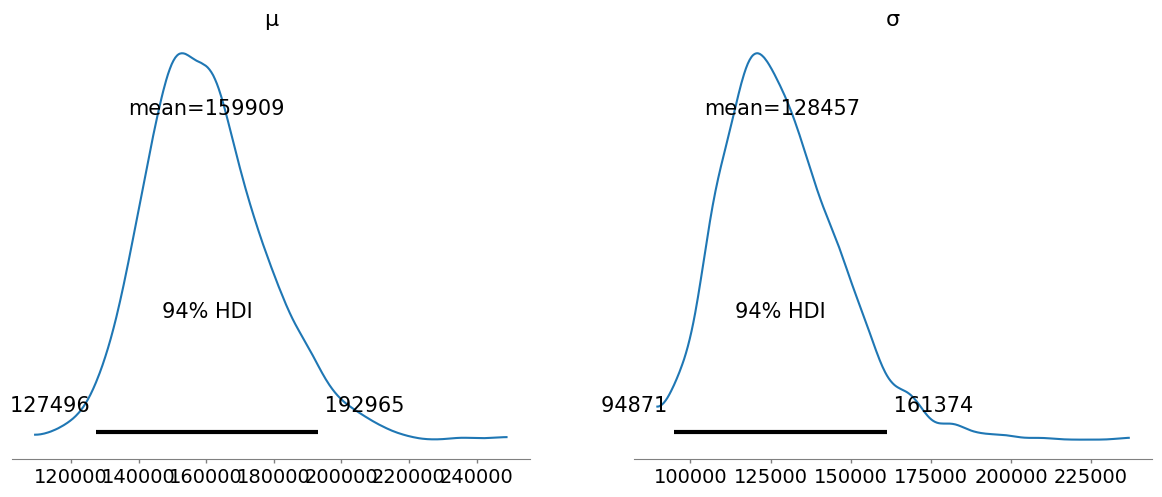

In [ ]:
az.plot_posterior(idata)


In [ ]:
pm.sample_posterior_predictive(idata, model=bswc_model, extend_inferencedata=True)

<Axes: xlabel='Y'>

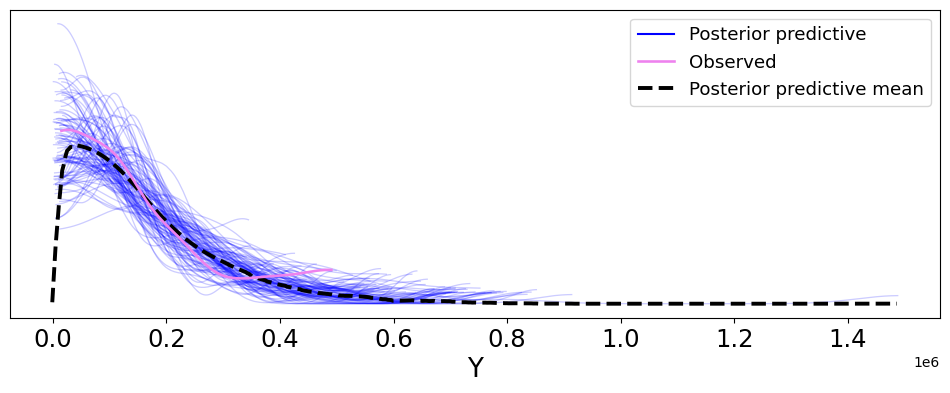

In [ ]:
az.plot_ppc(idata, num_pp_samples=100, figsize=(12, 4), colors=["blue", "violet", "black"])

This is a pretty good model. The average of the posterior predictives is pretty close to what out observed data models, though it probably shouldn't go down to 0 since Sanderson's likely never published a book with 0 words. Our observed data also goes up in frequency nearing 500000, which is probably because of his Stormlight Archives series, which all tend to be considerably longer in length than the Mistborn, Skyward, or other such normally-lengthed-books series.

# Likelihood No 2

In [ ]:
#N for normal
with pm.Model() as bswc_model_2:
    #this one is new, but its exactly what it sounds like: half of a normal dist
    σ = pm.HalfNormal('σ', sigma=100000)

    #our fancy new likelihood, with two priors
    Y2 = pm.HalfNormal('Y2', sigma = σ, observed=data.WC)
    idata2 = pm.sample()

<Axes: title={'center': 'σ'}>

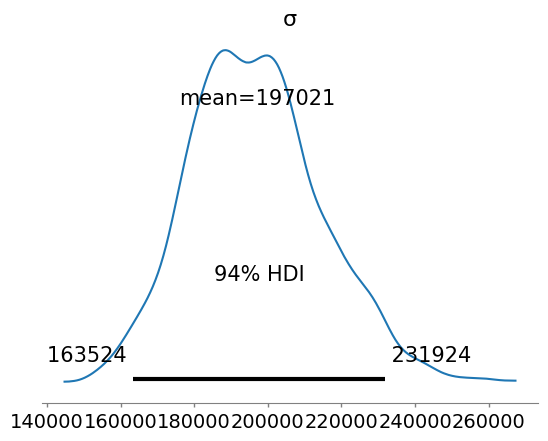

In [ ]:
az.plot_posterior(idata2)


In [ ]:
pm.sample_posterior_predictive(idata2, model=bswc_model_2, extend_inferencedata=True)

<Axes: xlabel='Y2'>

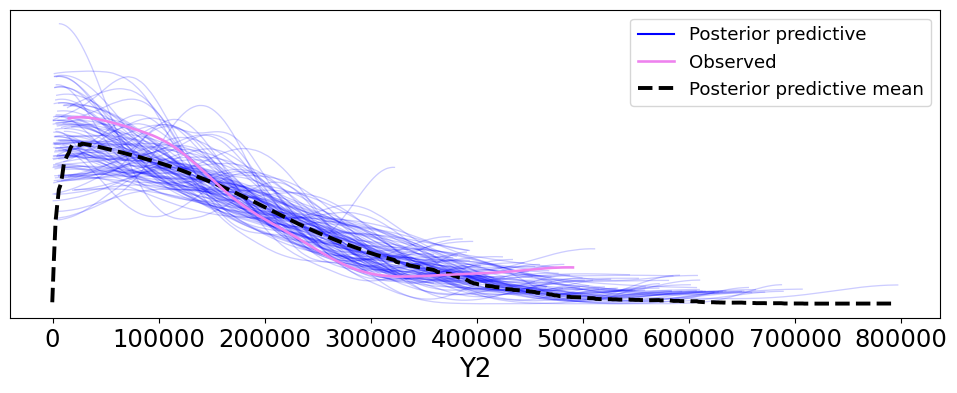

In [ ]:
az.plot_ppc(idata2, num_pp_samples=100, figsize=(12, 4), colors=["blue", "violet", "black"])

This model is also pretty close to what we've observed, though it also doesn't model the upward tick in frequencies as we near 500000 and also incorrectly models that Sanderson wrote books with 0 words.

# Conclusion

Both the Gamma and Half Normal distributions seem to model my observed data pretty accurately, but I think the Gamma distribution models it better. According to PreliZ, the Gamma distribution "describes the time until a specified number of events occur in a Poisson process, in which alpha events occur continuously and independently at a constant average rate beta" and is often used to predict the number of times it takes for a certain number of successes to occur. If I stretch it, this kind of makes sense, as an author has a certain amount of time to write a book and each word has to be thought about and has its own rate of being written down, and the time that it takes to write a book is probably related to the overall word count. But that's reaaaaallllly stretching it.

The Half Normal might actually make more sense logically. A book's word count is the result of an amalgamation of factors independent of the actual word count, including the plot length, writing style, and audienceA Half Normal distribution might make more sense because of that, given how a normal distribution is the "result of summing many small, independent effects". On the other hand, Sanderson has definitely not been writing an egregious number of books with word count 0, which the true Half Normal suggests.

